# Общая информация

Машинное обучение, ФКН ВШЭ

Практическое задание 7. Бустинговое



Дата выдачи: 06.12.2021

Мягкий дедлайн: 18.12.2021 23:59 MSK

Жёсткий дедлайн: 19.12.2021 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-07-Username.ipynb

Username — ваша фамилия на латинице

# О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [1]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style='darkgrid')
filterwarnings('ignore')

In [2]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустинга (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [6]:
boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

CPU times: user 1.82 s, sys: 41.4 ms, total: 1.86 s
Wall time: 2 s
Train ROC-AUC 0.9913
Valid ROC-AUC 0.9113
Test ROC-AUC 0.9134


## Задание 2. Обучение градиентного бустинга (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

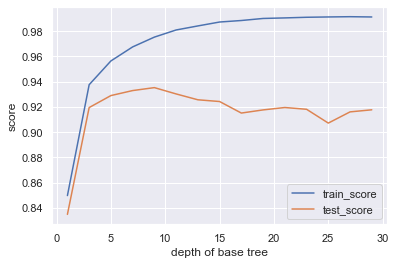

In [7]:
results = {'train_scores': [], 'test_scores': []}

depths = range(1, 30, 2)

for depth in depths:
    boosting = Boosting(base_model_params={'max_depth': depth})
    boosting.fit(x_train, y_train, x_valid, y_valid)
    results['train_scores'].append(boosting.score(x_train, y_train))
    results['test_scores'].append(boosting.score(x_test, y_test))

plt.plot(depths, results['train_scores'], label='train_score')
plt.plot(depths, results['test_scores'], label='test_score')

plt.xlabel('depth of base tree')
plt.ylabel("score")
plt.legend()
plt.show()

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**
<div style="background: #f0f4e6; border: 2px solid #6b8e23;">
    <p style="margin: 15px; line-height: 1.5; text-align: left;">
        На тестовой выборке максимум находится на глуине дерева от 5 до 10, так как при большой глубине вероятность переобучения дерева выше.

## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (2 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей. Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/).

In [8]:
#!pip install optuna

In [9]:
from sklearn.metrics import roc_auc_score
import optuna

def score(clf, x, y):
    return roc_auc_score(y == 1, clf.predict_proba(x)[:, 1])

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 1, 500, 50)
    learning_rate = trial.suggest_float('learning_rate', 0.0001, 1.0, step=0.05)
    
    clf = Boosting(n_estimators=n_estimators, learning_rate=learning_rate)
    
    clf.fit(x_test, y_test, x_valid, y_valid)
    return score(clf, x_test, y_test)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
print(study.best_params)

[I 2022-12-25 23:15:58,245] A new study created in memory with name: no-name-f0a8c108-cbe2-4fb5-bf74-835df195f13d
[I 2022-12-25 23:16:10,020] Trial 0 finished with value: 0.9999744144047689 and parameters: {'n_estimators': 451, 'learning_rate': 0.2501}. Best is trial 0 with value: 0.9999744144047689.
[I 2022-12-25 23:16:17,896] Trial 1 finished with value: 0.9999744144047689 and parameters: {'n_estimators': 301, 'learning_rate': 0.8501000000000001}. Best is trial 0 with value: 0.9999744144047689.
[I 2022-12-25 23:16:20,335] Trial 2 finished with value: 0.9955705430286732 and parameters: {'n_estimators': 101, 'learning_rate': 0.050100000000000006}. Best is trial 0 with value: 0.9999744144047689.
[I 2022-12-25 23:16:29,480] Trial 3 finished with value: 0.999974414404769 and parameters: {'n_estimators': 351, 'learning_rate': 0.4001}. Best is trial 3 with value: 0.999974414404769.
[I 2022-12-25 23:16:33,364] Trial 4 finished with value: 0.9999736271556847 and parameters: {'n_estimators': 1

{'n_estimators': 351, 'learning_rate': 0.4001}


<div style="background: #f0f4e6; border: 2px solid #6b8e23;">
    <p style="margin: 15px; line-height: 1.5; text-align: left;">
        какой-то космос получился

## Задание 4. Интерпретация бустингового (1 балл)

Постройте калибровочную кривую для вашей лучшей модели бустинга (из тех, что используют вашу реализацию).
Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регресии, сравните их между собой. Проанализируйте полученные результаты.

In [10]:
def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 10
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2)
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1))
    plt.figure(figsize=(6,6))
    plt.plot(bin_middle_points, bin_real_ratios)
    plt.ylim([-0.05, 1.05])
    plt.grid()

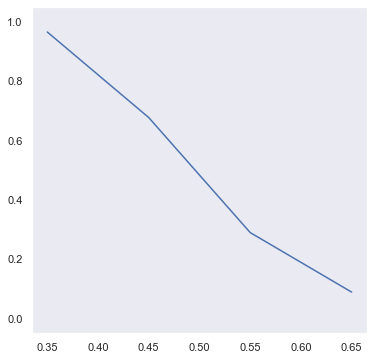

In [11]:
preds = boosting.predict_proba(x_test)
plot_calibration_curve(y_test, np.array(preds)[:,0])

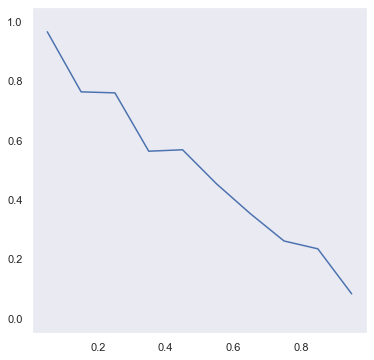

In [12]:
from sklearn.linear_model import LogisticRegression

plot_calibration_curve(y_test, np.array(LogisticRegression().fit(x_train, y_train).predict_proba(x_test))[:,0])

<div style="background: #f0f4e6; border: 2px solid #6b8e23;">
    <p style="margin: 15px; line-height: 1.5; text-align: left;">
        Выглядит лучше

Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

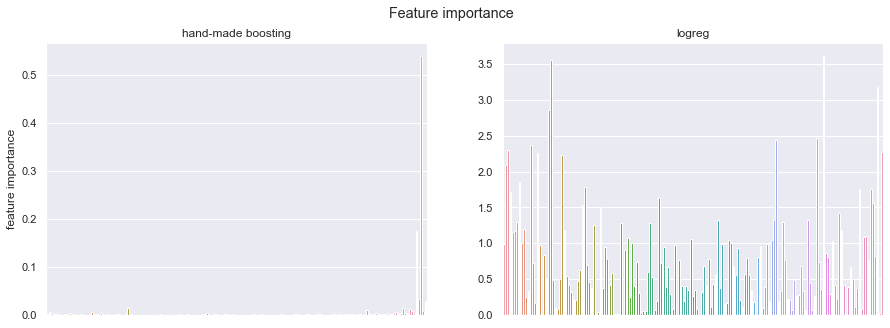

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
fig.suptitle('Feature importance')

sns.barplot(y=boosting.feature_importances_, x=np.arange(boosting.n_features), ax=axes[0])
axes[0].set_title('hand-made boosting')
sns.barplot(y=np.abs(LogisticRegression().fit(x_train, y_train).coef_[0]), x=np.arange(boosting.n_features), ax=axes[1])
axes[1].set_title('logreg')
             
axes[0].set_ylabel('feature importance')

for ax in axes:
    ax.set_xticks([])

plt.show()

<div style="background: #f0f4e6; border: 2px solid #6b8e23;">
    <p style="margin: 15px; line-height: 1.5; text-align: left;">
        Логистическая регрессия опирается на большее количество признаков, а бустинг есть несколько признаков с высокой важностью и много с важностью около нуля. Это может быть связано с типом модели: так как в бустинге деревья, которые стараются найти лучший сплит среди всех признаков, то какая-то чать признаков оказывается наиболее значимой<br>
        В логистической регрессии не рассматривается наборы признаков, поэтому распределение важности более равномерное

Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

In [14]:
#базовые параметры
boosting = Boosting()
boosting.fit(x_train, y_train, x_valid, y_valid)
boosting.score(x_test, y_test)

0.909804085192947

In [15]:
#беру 10%
feature_indices = np.argsort(boosting.feature_importances_)[::-1][:(boosting.n_features) // 10]

#из подбора гиперпараметров в оптуне(trial 4)
n_estimators = 201
learning_rate = 0.5501

new_boosting = Boosting(n_estimators=n_estimators, learning_rate=learning_rate)
new_boosting.fit(x_train[:, feature_indices],
                 y_train,
                 x_valid[:, feature_indices],
                 y_valid)

new_boosting.score(x_test[:, feature_indices], y_test)

0.9009786293363649

<div style="background: #f0f4e6; border: 2px solid #6b8e23;">
    <p style="margin: 15px; line-height: 1.5; text-align: left;">
        Стало чуть хуже

## Задание 5 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

In [16]:
class Blender():

    def __init__(self, clfs, 
                clfs_params, 
                metamodel=LogisticRegression, 
                metamodel_params={}):

        self.clfs = clfs
        self.clfs_params = clfs_params

        self.metamodel = metamodel
        self.metamodel_params = metamodel_params

        self.meta_features = []
        self.models_trained = []

    def train_meta(self, features, target):
        self.metamodel = self.metamodel(**self.metamodel_params)
        self.metamodel.fit(features, target)

    def fit(self, x_train, y_train, x_valid, y_valid):
        for clf in self.clfs:
            model = clf(**self.clfs_params[clf])
            if clf == Boosting:
                model.fit(x_train, y_train, x_valid, y_valid)
            else:
                model.fit(x_train, y_train)
            self.models_trained.append(model)
            self.meta_features.append(model.predict_proba(x_valid)[:, 0])

        self.train_meta(np.array(self.meta_features).T, y_valid)

    def predict_proba(self, x_test):
        features = []
        for model in self.models_trained:
            features.append(model.predict_proba(x_test)[:, 0])
        return self.metamodel.predict_proba(np.array(features).T)

In [17]:
clfs = [Boosting]
clf_params = {Boosting: {'base_model_params': 
                         {'criterion': 'friedman_mse',
                          'max_depth': 9,
                          'max_features': None,
                          'min_samples_leaf': 50,
                          'min_samples_split': 50,
                          'splitter': 'best'},
                         'learning_rate': 1, 'n_estimators': 51 },
}

metamodel_params = {}
metamodel = LogisticRegression()

In [18]:
blender = Blender(clfs, clf_params)
blender.fit(x_train, y_train, x_valid, y_valid)
score(blender, x_test, y_test)

0.9370806914566154

<div style="background: #f0f4e6; border: 2px solid #6b8e23;">
    <p style="margin: 15px; line-height: 1.5; text-align: left;">
        Да, качество стало значительно лучше

## Задание 6 (бонус). Катбустовое (1 балл)

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

In [19]:
#!pip install catboost

from boosting import score
from catboost import CatBoostClassifier
from tqdm import tqdm

In [20]:
#изначальное качество
cbc = CatBoostClassifier()
cbc.fit(x_train, y_train, eval_set=(x_valid, y_valid), verbose=0)
score(cbc, x_test, y_test)

0.9407961135087219

**depth**

100%|██████████| 7/7 [01:27<00:00, 12.56s/it]


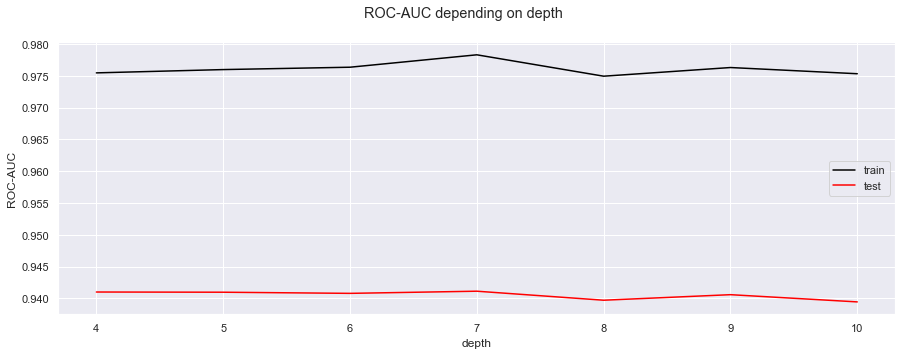

In [21]:
results = {}
results['train'], results['test'] = {}, {}

depth = [4, 5, 6, 7, 8, 9, 10] # options from documentation 

for value in tqdm(depth):
    cbc = CatBoostClassifier(depth=value, verbose=0)
    cbc.fit(x_train, y_train, eval_set=(x_valid, y_valid))
    results['test'][value] = score(cbc, x_test, y_test)
    results['train'][value] = score(cbc, x_train, y_train)


fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)
fig.suptitle('ROC-AUC depending on depth')

sns.lineplot(x=results['train'].keys(), y=results['train'].values(), label='train', ax=axes, color='black')
sns.lineplot(x=results['test'].keys(), y=results['test'].values(), label='test', ax=axes, color='red')
             
axes.set_ylabel('ROC-AUC')
axes.set_xlabel('depth')

plt.show()

In [22]:
depth = list(results['test'].keys())[np.argmax(list(results['test'].values()))]
depth

7

**min_data_in_leaf**

In [23]:
results = {}
results['train'], results['test'] = {}, {}

min_data_in_leaf = np.arange(5, 55, 5) ** 2

for value in tqdm(min_data_in_leaf):
    cbc = CatBoostClassifier(min_data_in_leaf=value, depth=depth, verbose=0)
    cbc.fit(x_train, y_train, eval_set=(x_valid, y_valid))
    results['test'][value] = score(cbc, x_test, y_test)
    results['train'][value] = score(cbc, x_train, y_train)

min_data_in_leaf = list(results['test'].keys())[np.argmax(list(results['test'].values()))]
min_data_in_leaf

100%|██████████| 10/10 [01:33<00:00,  9.34s/it]


25

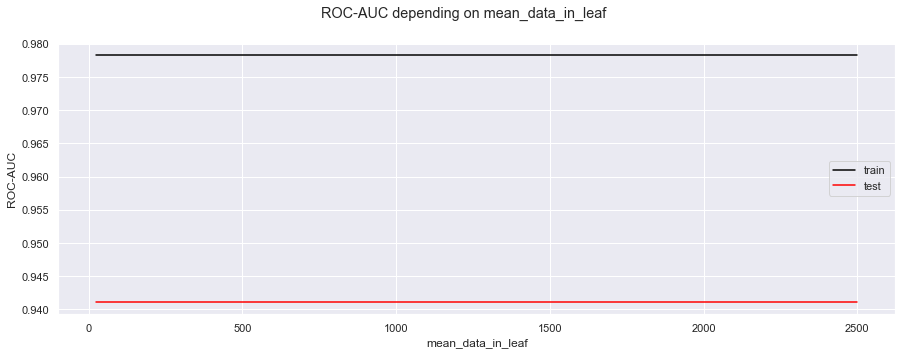

In [24]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)
fig.suptitle('ROC-AUC depending on mean_data_in_leaf')

sns.lineplot(x=results['train'].keys(), y=results['train'].values(), label='train', ax=axes, color='black')
sns.lineplot(x=results['test'].keys(), y=results['test'].values(), label='test', ax=axes, color='red')
             
axes.set_ylabel('ROC-AUC')
axes.set_xlabel('mean_data_in_leaf')

plt.show()

**l2_leaf_reg**

In [25]:
results = {}
results['train'], results['test'] = {}, {}

l2_leaf_reg = np.arange(5) ** 2

for value in tqdm(l2_leaf_reg):
    cbc = CatBoostClassifier(l2_leaf_reg=value, depth=depth, 
                             min_data_in_leaf=min_data_in_leaf, verbose=0)
    cbc.fit(x_train, y_train, eval_set=(x_valid, y_valid))
    results['test'][value] = score(cbc, x_test, y_test)
    results['train'][value] = score(cbc, x_train, y_train)

l2_leaf_reg = list(results['test'].keys())[np.argmax(list(results['test'].values()))]
l2_leaf_reg

100%|██████████| 5/5 [00:45<00:00,  9.12s/it]


16

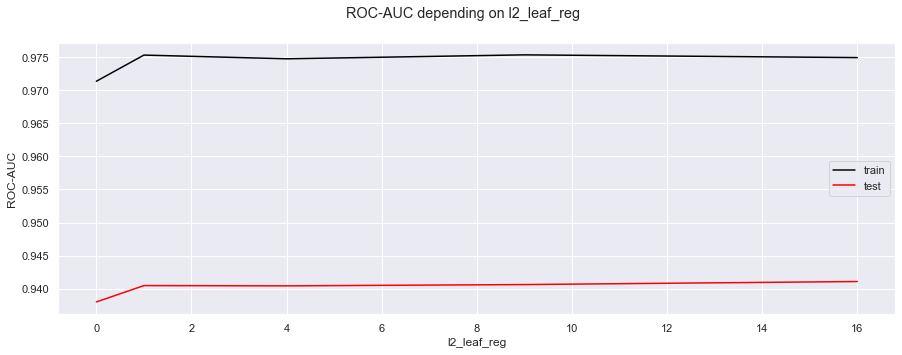

In [26]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)
fig.suptitle('ROC-AUC depending on l2_leaf_reg')

sns.lineplot(x=results['train'].keys(), y=results['train'].values(), label='train', ax=axes, color='black')
sns.lineplot(x=results['test'].keys(), y=results['test'].values(), label='test', ax=axes, color='red')
             
axes.set_ylabel('ROC-AUC')
axes.set_xlabel('l2_leaf_reg')

plt.show()

In [27]:
from sklearn.model_selection import ParameterGrid

param_grid = {
    'boosting_type': ['Ordered', 'Plain'],
    'leaf_estimation_method': ['Newton', 'Gradient', 'Exact']
}

other_params = {'depth': depth, 
                'mean_data_in_leaf': min_data_in_leaf, 
                'l2_leaf_reg': l2_leaf_reg,
                'verbose': 0}

results = {}

for grid in tqdm(list(ParameterGrid(param_grid))):
    print(grid)
    cbc = CatBoostClassifier(verbose=0, 
                             l2_leaf_reg=l2_leaf_reg, 
                             depth=depth, 
                             min_data_in_leaf=min_data_in_leaf,
                             boosting_type=grid['boosting_type'],
                             leaf_estimation_method=grid['leaf_estimation_method']
                             )
    try:
        cbc.fit(x_train, y_train, eval_set=(x_valid, y_valid))
        results[boosting.score(x_test, y_test)] = grid
    except: #CatBoostError
        pass

grid = list(results.values())[np.argmax(list(results.keys()))]
grid

  0%|          | 0/6 [00:00<?, ?it/s]

{'boosting_type': 'Ordered', 'leaf_estimation_method': 'Newton'}


 17%|█▋        | 1/6 [00:32<02:42, 32.51s/it]

{'boosting_type': 'Ordered', 'leaf_estimation_method': 'Gradient'}


 33%|███▎      | 2/6 [01:51<04:00, 60.08s/it]

{'boosting_type': 'Ordered', 'leaf_estimation_method': 'Exact'}
{'boosting_type': 'Plain', 'leaf_estimation_method': 'Newton'}


 67%|██████▋   | 4/6 [02:01<00:51, 25.58s/it]

{'boosting_type': 'Plain', 'leaf_estimation_method': 'Gradient'}


100%|██████████| 6/6 [02:24<00:00, 24.09s/it]

{'boosting_type': 'Plain', 'leaf_estimation_method': 'Exact'}


{'boosting_type': 'Plain', 'leaf_estimation_method': 'Gradient'}

In [28]:
# best_model_min_trees

results = {}
results['train'], results['test'] = {}, {}

best_model_min_trees =  np.arange(5, 55, 5) ** 2

for value in tqdm(best_model_min_trees):
    cbc = CatBoostClassifier(l2_leaf_reg=l2_leaf_reg, depth=depth, 
                             min_data_in_leaf=min_data_in_leaf, verbose=0,
                             boosting_type=grid['boosting_type'],
                             leaf_estimation_method=grid['leaf_estimation_method'],
                             best_model_min_trees=value
                             )
    cbc.fit(x_train, y_train, eval_set=(x_valid, y_valid))
    results['test'][value] = score(cbc, x_test, y_test)
    results['train'][value] = score(cbc, x_train, y_train)

best_model_min_trees = list(results['test'].keys())[np.argmax(list(results['test'].values()))]
best_model_min_trees

100%|██████████| 10/10 [03:43<00:00, 22.30s/it]


625

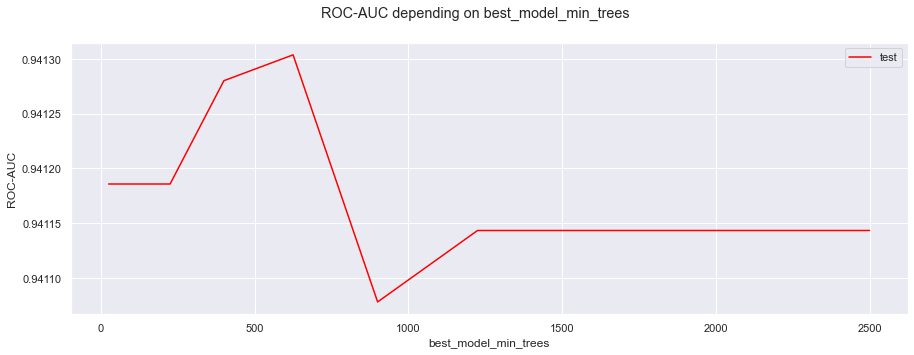

In [29]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)
fig.suptitle('ROC-AUC depending on best_model_min_trees')

sns.lineplot(x=results['test'].keys(), y=results['test'].values(), label='test', ax=axes, color='red')
             
axes.set_ylabel('ROC-AUC')
axes.set_xlabel('best_model_min_trees')

plt.show()

In [30]:
#итоговое качество
cbc = CatBoostClassifier(l2_leaf_reg=l2_leaf_reg, depth=depth, 
                            min_data_in_leaf=min_data_in_leaf, verbose=0,
                            boosting_type=grid['boosting_type'],
                            leaf_estimation_method=grid['leaf_estimation_method'],
                            best_model_min_trees=best_model_min_trees
                            )
cbc.fit(x_train, y_train, eval_set=(x_valid, y_valid))
score(cbc, x_test, y_test)

0.9413038891679248

<div style="background: #f0f4e6; border: 2px solid #6b8e23;">
    <p style="margin: 15px; line-height: 1.5; text-align: left;">
        Качество лучше, чем в блендинге

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2022 года?

Я в этом году без елки, но вот вам красивые олени из Сбера
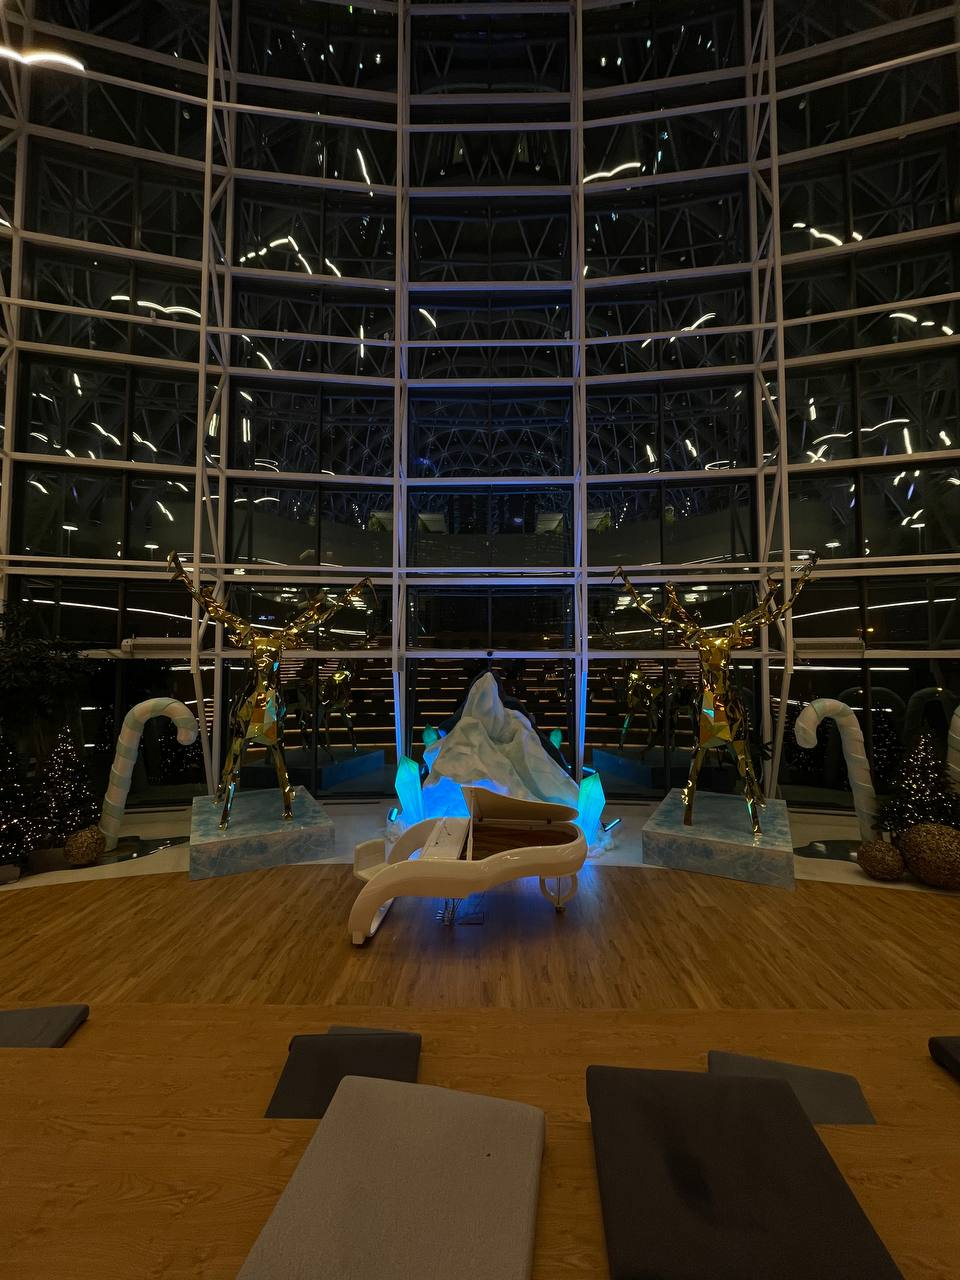